### IMPORT LIBRARIES

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

MOUNT GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CHANEGE TO THE CURRENT WORKING DIRECTRY

In [ ]:
os.chdir("/content/drive/My Drive/Deep Learning Project 1/")
os.getcwd()

'/content/drive/My Drive/Deep Learning Project 1'

LOAD AND DISPLAY A CERTAIN IMAGE

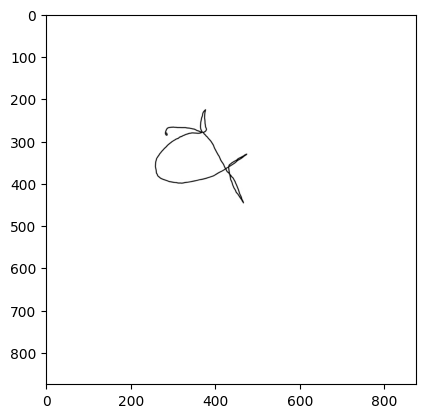

In [ ]:
#Load certain image
img = image.load_img("Training/a/1.jpeg")

#Display image
plt.imshow(img)

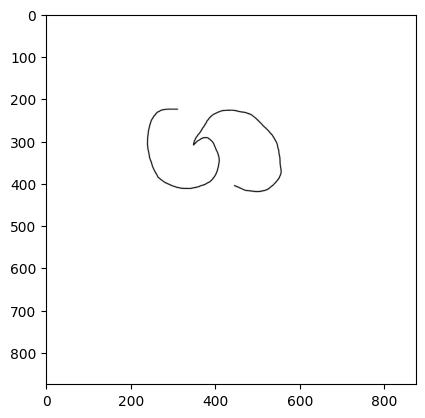

In [ ]:
#Load certain image
img = image.load_img("Training/ga/1.jpeg")

#Display image
plt.imshow(img)

GET THE SHAPE OF THE IMAGE

In [ ]:
cv2.imread("Training/ga/1.jpeg").shape

(875, 875, 3)

LOAD THE DATASET

In [ ]:
# Create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)

In [ ]:
# Create a training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('Training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'a': 0, 'ga': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

MODELLING

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30)

Epoch 1/30
5/5 [==============================] - 7s 1s/step - loss: 15.1702 - accuracy: 0.5333
Epoch 2/30
5/5 [==============================] - 5s 765ms/step - loss: 1.6923 - accuracy: 0.1333
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 0.7478 - accuracy: 0.6000
Epoch 4/30
5/5 [==============================] - 4s 601ms/step - loss: 0.7345 - accuracy: 0.4000
Epoch 5/30
5/5 [==============================] - 3s 450ms/step - loss: 0.7521 - accuracy: 0.4000
Epoch 6/30
5/5 [==============================] - 3s 627ms/step - loss: 0.7792 - accuracy: 0.6429
Epoch 7/30
5/5 [==============================] - 2s 456ms/step - loss: 0.7131 - accuracy: 0.5333
Epoch 8/30
5/5 [==============================] - 2s 445ms/step - loss: 0.9527 - accuracy: 0.4000
Epoch 9/30
5/5 [==============================] - 2s 449ms/step - loss: 0.6810 - accuracy: 0.6000
Epoch 10/30
5/5 [==============================] - 3s 521ms/step - loss: 0.6918 - accuracy: 0.6429
Epoch 11/30
5/5 [=======

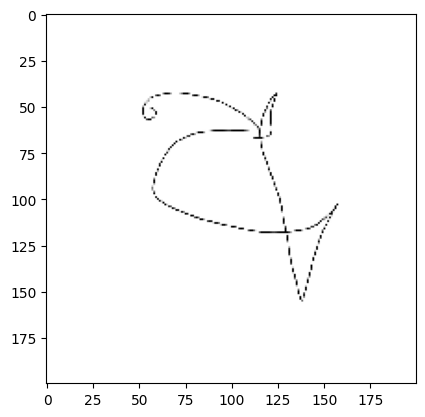

1/1 [==============================] - 0s 200ms/step
This is Letter 'ග' in Sinhala


In [ ]:
dir_path = 'Testing/'

image_filename = '13.jpeg'

# Load the image and resize it to the target size
img = image.load_img(dir_path + image_filename, target_size=(200, 200))

# Display the image using matplotlib
plt.imshow(img)
plt.show()

# Convert the image to a NumPy array and add an extra dimension
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

# Make a prediction using the trained model
val = model.predict(X)

# Check the predicted value and print the corresponding class label
if val == 0:
    print("This is Letter 'අ' in Sinhala")
else:
    print("This is Letter 'ග' in Sinhala")

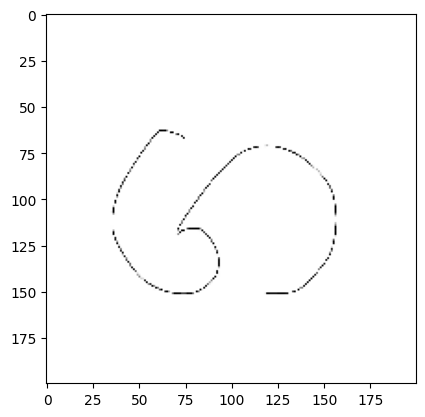

1/1 [==============================] - 0s 41ms/step
This is Letter 'ග' in Sinhala


In [ ]:
dir_path = 'Testing/'

image_filename = '17.jpeg'

# Load the image and resize it to the target size
img = image.load_img(dir_path + image_filename, target_size=(200, 200))

# Display the image using matplotlib
plt.imshow(img)
plt.show()

# Convert the image to a NumPy array and add an extra dimension
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

# Make a prediction using the trained model
val = model.predict(X)

# Check the predicted value and print the corresponding class label
if val == 0:
    print("This is Letter 'අ' in Sinhala")
else:
    print("This is Letter 'ග' in Sinhala")

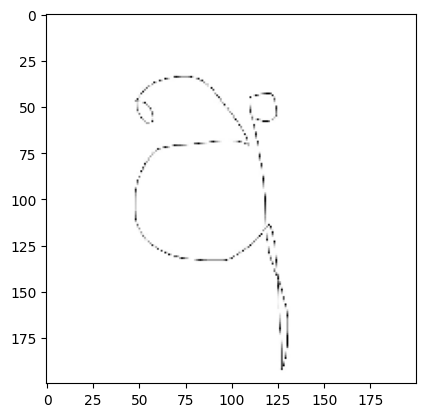

1/1 [==============================] - 0s 36ms/step
This is Letter 'අ' in Sinhala


In [ ]:
dir_path = 'Testing/'

image_filename = '4.jpeg'

# Load the image and resize it to the target size
img = image.load_img(dir_path + image_filename, target_size=(200, 200))

# Display the image using matplotlib
plt.imshow(img)
plt.show()

# Convert the image to a NumPy array and add an extra dimension
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

# Make a prediction using the trained model
val = model.predict(X)

# Check the predicted value and print the corresponding class label
if val == 0:
    print("This is Letter 'අ' in Sinhala")
else:
    print("This is Letter 'ග' in Sinhala")